## Plot AUC/GFLOPS presentation
- This notebook reads performance metrics from multiple CSV files in the `'results/presentation'` directory, each file is for a different model.   
- The data is aggregated, and a scatter plot is generated to compare each model's GFLOPS against its classification performance (Test AUC).   
- The aim is to visually identify trade-offs between computational efficiency and model performance.

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:

# Specify the directory containing the CSV files
data_dir = 'results/presentation'

# Get the list of all CSV files in the directory
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
print(csv_files)
combined_data = pd.DataFrame()

# Read each CSV and append the data to the combined DataFrame
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_data = pd.concat([combined_data, df])

['data/results/presentation\\AlexNet_lr01_epoch5.csv', 'data/results/presentation\\GoogLeNet_lr01_epoch5.csv', 'data/results/presentation\\ResNet_lr01_epoch5.csv']


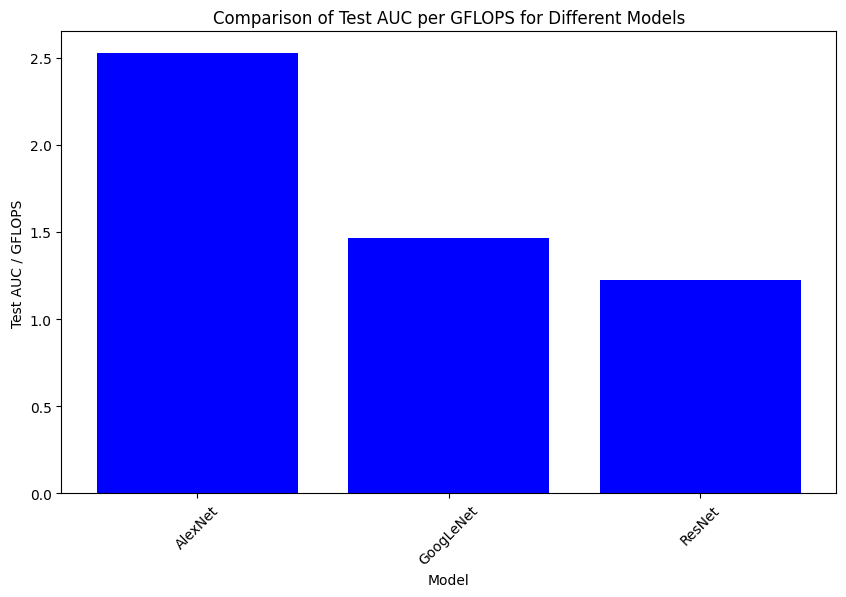

In [6]:

# Calculate test_auc / gflops
combined_data['test_auc_per_gflops'] = combined_data['test_auc'] / combined_data['gflops']

# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['model'], grouped_data['test_auc_per_gflops'], color='blue')
plt.xlabel('Model')
plt.ylabel('Test AUC / GFLOPS')
plt.title('Comparison of Test AUC per GFLOPS for Different Models')
plt.xticks(rotation=45)
plt.show()

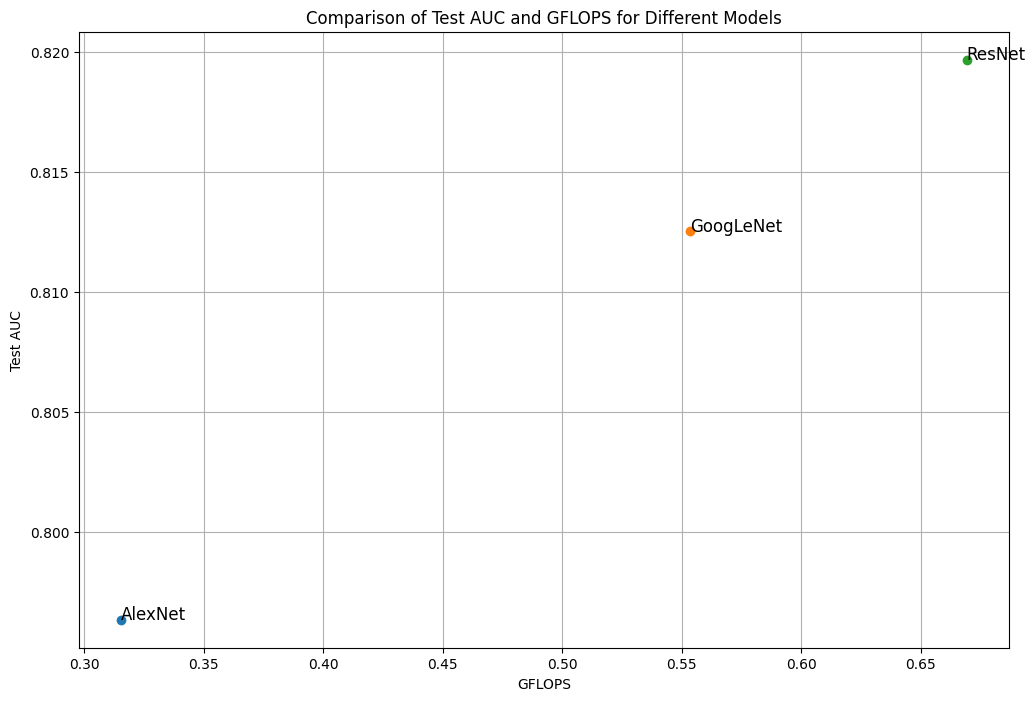

In [8]:
# Group by model and take the mean if each model appears multiple times
grouped_data = combined_data.groupby('model').mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
for i, model in enumerate(grouped_data['model']):
    plt.scatter(grouped_data['gflops'][i], grouped_data['test_auc'][i])
    plt.text(grouped_data['gflops'][i], grouped_data['test_auc'][i], model, fontsize=12)

plt.xlabel('GFLOPS')
plt.ylabel('Test AUC')
plt.title('Comparison of Test AUC and GFLOPS for Different Models')
plt.grid(True)
plt.show()